In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
# Load data
fashion_mnist = tf.keras.datasets.fashion_mnist 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Data preprocessing
X_train = np.expand_dims(X_train, axis=-1) / 255.0
X_test = np.expand_dims(X_test, axis=-1) / 255.0

# Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2)

In [3]:
X_train.shape

(48000, 28, 28, 1)

In [4]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (7, 7), activation="relu", input_shape=[28, 28, 1]),
    layers.Conv2D(64, (5, 5), activation="relu"),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [5]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])

hist = model.fit(X_train, y_train,
                 batch_size=32, epochs=15,
                 validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 9s 180us/sample - loss: 0.4800 - accuracy: 0.8276 - val_loss: 0.3633 - val_accuracy: 0.8668
Epoch 2/15
48000/48000 [==============================] - 7s 150us/sample - loss: 0.3112 - accuracy: 0.8860 - val_loss: 0.2878 - val_accuracy: 0.8921
Epoch 3/15
48000/48000 [==============================] - 7s 151us/sample - loss: 0.2553 - accuracy: 0.9053 - val_loss: 0.2650 - val_accuracy: 0.9011
Epoch 4/15
48000/48000 [==============================] - 7s 151us/sample - loss: 0.2128 - accuracy: 0.9206 - val_loss: 0.2588 - val_accuracy: 0.9030
Epoch 5/15
48000/48000 [==============================] - 7s 151us/sample - loss: 0.1731 - accuracy: 0.9354 - val_loss: 0.2635 - val_accuracy: 0.9107
Epoch 6/15
48000/48000 [==============================] - 7s 150us/sample - loss: 0.1399 - accuracy: 0.9480 - val_loss: 0.2477 - val_accuracy: 0.9098
Epoch 7/15
48000/48000 [==========================

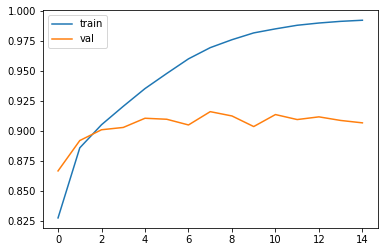

In [6]:
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()
plt.show()

![](https://miro.medium.com/max/1280/1*gGI9oAz0REW2hnU6YKmqDQ.jpeg)

In [7]:
l2 = tf.keras.regularizers.l2(l=0.001)

model_reg = tf.keras.models.Sequential([
    layers.Conv2D(32, (7, 7), activation="relu", kernel_regularizer=l2,
                  input_shape=[28, 28, 1]),
    layers.Conv2D(64, (5, 5), activation="relu", kernel_regularizer=l2),
    layers.Flatten(),
    layers.Dense(256, activation="relu", kernel_regularizer=l2),
    layers.Dense(128, activation="relu", kernel_regularizer=l2),
    layers.Dense(10, activation="softmax", kernel_regularizer=l2)
])

model_reg.compile(loss="sparse_categorical_crossentropy",
                  optimizer=tf.optimizers.Adam(learning_rate=3e-3),
                  metrics=["accuracy"])

hist = model_reg.fit(X_train, y_train,
                 batch_size=32, epochs=30,
                 validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 10s 208us/sample - loss: 0.7968 - accuracy: 0.8021 - val_loss: 0.6186 - val_accuracy: 0.8386
Epoch 2/30
48000/48000 [==============================] - 9s 194us/sample - loss: 0.5836 - accuracy: 0.8508 - val_loss: 0.5372 - val_accuracy: 0.8622
Epoch 3/30
48000/48000 [==============================] - 9s 195us/sample - loss: 0.5313 - accuracy: 0.8614 - val_loss: 0.4959 - val_accuracy: 0.8720
Epoch 4/30
48000/48000 [==============================] - 9s 197us/sample - loss: 0.5085 - accuracy: 0.8685 - val_loss: 0.5032 - val_accuracy: 0.8722
Epoch 5/30
48000/48000 [==============================] - 10s 201us/sample - loss: 0.4971 - accuracy: 0.8701 - val_loss: 0.4801 - val_accuracy: 0.8750
Epoch 6/30
48000/48000 [==============================] - 9s 190us/sample - loss: 0.4901 - accuracy: 0.8737 - val_loss: 0.4806 - val_accuracy: 0.8748
Epoch 7/30
48000/48000 [========================

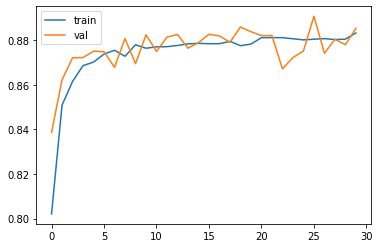

In [8]:
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [9]:
l2 = tf.keras.regularizers.l2(l=0.001)

model = tf.keras.models.Sequential([
    layers.Conv2D(32, (7, 7), activation="relu", kernel_regularizer=l2,
                  input_shape=[28, 28, 1]),
    layers.Conv2D(64, (5, 5), activation="relu", kernel_regularizer=l2),
    layers.Conv2D(128, (3, 3), activation="relu", kernel_regularizer=l2),
    layers.Flatten(),
    layers.Dense(256, activation="relu", kernel_regularizer=l2),
    layers.Dense(128, activation="relu", kernel_regularizer=l2),
    layers.Dense(64, activation="relu", kernel_regularizer=l2),
    layers.Dense(10, activation="softmax", kernel_regularizer=l2)
])

model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=tf.optimizers.Adam(learning_rate=1e-3),
                  metrics=["accuracy"])

hist = model.fit(X_train, y_train,
                 batch_size=64, epochs=40,
                 validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 10s 206us/sample - loss: 0.8393 - accuracy: 0.8021 - val_loss: 0.6395 - val_accuracy: 0.8517
Epoch 2/40
48000/48000 [==============================] - 9s 192us/sample - loss: 0.5894 - accuracy: 0.8574 - val_loss: 0.5783 - val_accuracy: 0.8526
Epoch 3/40
48000/48000 [==============================] - 9s 192us/sample - loss: 0.5257 - accuracy: 0.8705 - val_loss: 0.4872 - val_accuracy: 0.8789
Epoch 4/40
48000/48000 [==============================] - 9s 190us/sample - loss: 0.4914 - accuracy: 0.8785 - val_loss: 0.4786 - val_accuracy: 0.8782
Epoch 5/40
48000/48000 [==============================] - 9s 194us/sample - loss: 0.4645 - accuracy: 0.8821 - val_loss: 0.4736 - val_accuracy: 0.8802
Epoch 6/40
48000/48000 [==============================] - 9s 190us/sample - loss: 0.4423 - accuracy: 0.8888 - val_loss: 0.4539 - val_accuracy: 0.8801
Epoch 7/40
48000/48000 [=========================

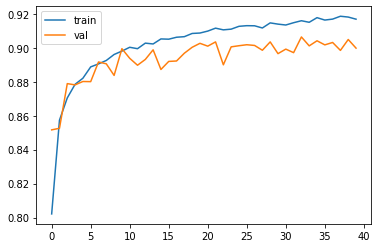

In [10]:
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()
plt.show()